<a href="https://colab.research.google.com/github/evmpython/CAT010_UNIFEI_2025/blob/main/CAT010_Aula_04_Tempestades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# 🟢 **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---






## **Aula Prática 4:** $\underline{Plotando \ Dados \ de \ Tempestades \ do \ Fortracc}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como analisar a evolução das tempestades por mês, hora e ciclo de vida. Para isto usaremos os dados de rastreamento de tempestades realizado pelo algoritmo Fortracc para o ano de 2015.

---


**DADOS DE ENTRADA**: Arquivos de tempestades

- **Formato do dado:** arquivos Excel
- **Nome do arquivo:** diurno_1501.xlsx / fam_1501_regiao.xlsx /  lifecycle_size_2h_1501.xlsx / lifecycle_tmin9_2h_1501.xlsx
- **Fonte dos dados:** CPTEC/INPE


---


**DADOS DE SAÍDA:**
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos JPG
- **Imagens geradas:**
    1. Fig_1_mensal_tempestades.jpg
    2. Fig_2_diurno_tempestades_mes01.jpg
    3. Fig_3_ciclovida_area_tempestades.jpg
    4. Fig_4_ciclovida_temperatura_tempestades.jpg





---







**METODOLOGIA:** Serão abordados os seguintes tópicos:

1.   Como ler arquivos Excel com o Pandas
2.   Como analisar o ciclo mensal de tempestades
3.   Como analisar o ciclo diurno de tempestades
4.   Como analisar o ciclo de vida de tempestades



---


**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Monta o google drive
3.   Define o caminho do google drive
4.   Importação das bibliotecas
5.   Análise da evolução mensal de tempestades
6.   Calculando a quantitade sazonal de tempestades
7.   Análise da evolução diurna de tempestades
8.   Evolução do ciclo de vida da área das tempestades
9.   Evolução do ciclo de vida da temperatura das tempestades


---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive

---
- **Realizado por:** Enrique V. Mattos - 09/11/2022
- **Atualizado por:** Enrique V. Mattos - 07/08/2025


---

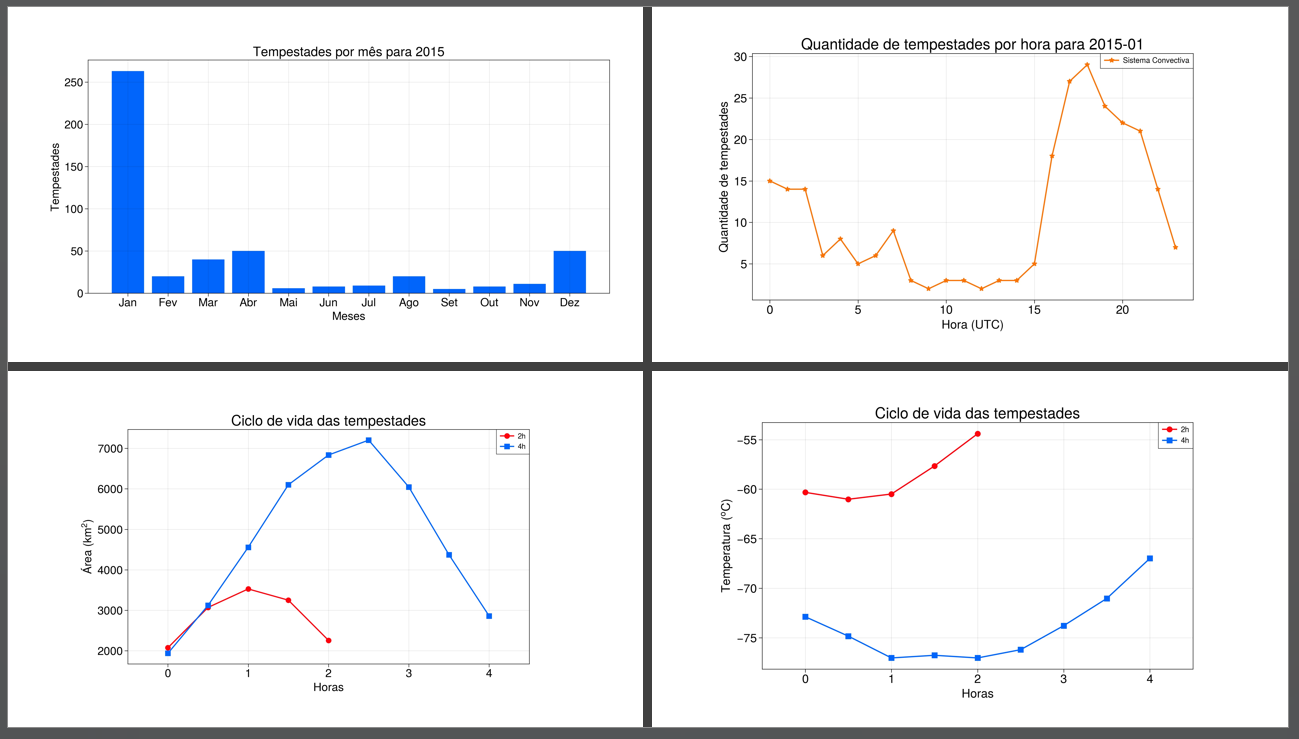

# **1° Passo:** Instalando as bibliotecas

In [ ]:
# Instalando o ultraplot (usado para gerar gráficos)
!pip install -q ultraplot

# **2° Passo:** Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **3° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**


- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [ ]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_04_SISTEMAS_CONVECTIVOS/'

- Criando a pasta de saída ("output")

In [ ]:
# cria a pasta de saída com o nome "output"
import os
os.makedirs(f'{dir}output/', exist_ok=True)

# **4° Passo:** Importando as bibliotecas



In [ ]:
# Importando as bibliotecas
import pandas as pd      # biblioteca para ler arquivos de tabelas
import ultraplot as uplt # bilioteca para plotar figuras

# Vamos ignorar avisos no código
import warnings
warnings.filterwarnings("ignore")

# **5° Passo:** Baixando os dados dos Sistemas Convectivos que estão no Github

Baixando os dados

In [ ]:
!wget https://github.com/evmpython/CAT010_UNIFEI_2025/raw/refs/heads/main/input/aula_04/dados_sistemas_convectivos.zip

Descompactando os dados

In [ ]:
import zipfile
with zipfile.ZipFile('/content/dados_sistemas_convectivos.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

# **PARTE 1):**
**ENUNCIADO**: Plote o ciclo **mensal** de ocorrência de tempestades de 2015 para a região Sudeste num gráfico de linha. Utilize as planilhas Excel mensais de tempestades. Descreva em qual mês ocorre o máximo e mínimo de tempestades e explique por que. Insira junto à resposta o gráfico que foi produzido.

## **Insira a quantidade de tempestades de cada mês**


1. Para isto acesse as planilhas que foram baixadas, e que estão disponíveis no drive, denominadas de **fam_1501_regiao.xlsx**, **fam_1502_regiao.xlsx** e etc.

2. Cada planilha corresponde a quantidade de tempestade daquele mês. Então insira a quantidade de tempestade de cada planilha (ou seja, de cada **mes**) na variável abaixo denominada **mes**.

**### ALUNO - FAZER AS MUDANÇAS AQUI ###:** Insira a quantidade de tempestades de cada mês

In [ ]:
# Exemplo
qte_por_mes = [263, 283, 308, 141, 88, 5, 45,
               10, 69, 90, 187, 242]

**Nome dos meses**

In [ ]:
mes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
       'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

**Exibe na tela os valores atribuídos a cada variável**

In [ ]:
print(mes)
print(qte_por_mes)

## **Plota o gráfico**

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(10,5), tight=True)

# plota o gráfico em forma de barras
ax.bar(mes,
       qte_por_mes,
       color='bright blue')

# formato dos eixos X e Y
ax.format(xlabel='Meses',
          ylabel='Tempestades',
          title='Tempestades por mês para 2015',
          small='20px',
          large='23px',
          xrotation=0,
          xtickminor=False,
          ytickminor=False)

# salva figura
fig.save(f'{dir}output/Fig_1_mensal_tempestades.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

# **PARTE 2):**
**ENUNCIADO**: Baseado nos dados da $\underline{questão \ 1)}$ determine a quantidade e a **porcentagem relativa** de tempestades que ocorreram em cada estação do ano: i) verão (dez, jan, fev), ii) outono (mar, abr, mai), iii) inverno (jun, jul, ago) e iv) primavera (set, out, nov). A partir da porcentagem relativa calculada, descreva em qual estação do ano ocorre o mínimo e máximo de tempestades e justifique sua resposta.

**Visualizando a variável que possui a quantidade de tempestades por mês `qte_por_mes` e a variável `mês`**:

In [ ]:
mes

In [ ]:
qte_por_mes

**### ALUNO - FAZER AS MUDANÇAS AQUI ###:** Somando as tempestades para cada estação do ano

In [ ]:
## Índices referente a cada mês

# janeiro: 0
# fevereiro: 1
# março: 2
# abril: 3
# maio: 4
# junho: 5
# julho: 6
# agosto: 7
# setembro: 8
# outubro: 9
# novembro: 10
# dezembro: 11

verao = qte_por_mes[11] + qte_por_mes[0] + qte_por_mes[1]
outono = qte_por_mes[2] + qte_por_mes[3] + qte_por_mes[4]     # alunos: preencher
#inverno =     # alunos: preencher
#primavera =   # alunos: preencher

**Somando o total de tempestades no ano todo**

In [ ]:
total = verao + outono + primavera + inverno

**### ALUNO - FAZER AS MUDANÇAS AQUI ###:** Calculando a porcentagem relativa (%) das tempestades para cada estação do ano**

In [ ]:
verao_em_porcentagem = (verao/total)*100.
outono_em_porcentagem = (outono/total)*100.     # alunos: preencher
#inverno_em_porcentagem =     # alunos: preencher
#primavera_em_porcentagem =   # alunos: preencher

In [ ]:
print(verao_em_porcentagem)
print(outono_em_porcentagem)
print(inverno_em_porcentagem)
print(primavera_em_porcentagem)

# **PARTE 3):**
**ENUNCIADO**: Plote o ciclo **diurno** para um determinado mês de 2015 do nascimento de tempestades para a região Sudeste num gráfico de linha. Utilize as planilhas excel de ciclo diurno de tempestades. Descreva em qual horário do dia (UTC e Hora local) ocorre o máximo e mínimo de nascimento de tempestade e explique por que. Insira junto à resposta o gráfico que foi produzido.  

##**a) ### ALUNO - FAZER AS MUDANÇAS AQUI ###:** Escolha o mês

In [ ]:
mes = '01'

## **b) Lendo o dado**

In [ ]:
# leitura do arquivo
df = pd.read_excel(f'/content/input/diurno_15{mes}.xlsx')

In [ ]:
# exibe a tabela dos dados
df

## **c) Analisando o dado**

**Visualizando o dado**

In [ ]:
df

**Agrupando o dado por hora**

In [ ]:
grupo_por_hora = df.groupby('HORA').count()['DURACAO']
grupo_por_hora

**Mostrando os índices da variável**

In [ ]:
horas = grupo_por_hora.index
horas

**Mostrando os valores da variável**

In [ ]:
qte = grupo_por_hora.values
qte

## **d) Gerando a figura**

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.plot(horas,
        qte,
        color='orange',
        marker='*',
        label='Sistema Convectivo')

# formatação de eixos etc
ax.format(xlabel='Hora (UTC)',
          ylabel='Quantidade de tempestades',
          title=f'Quantidade de tempestades por hora para 2015-{mes}',
          xtickminor=False,
          ytickminor=False,
          small='20px', large='25px',
          xlim=(-1, 24))

# Adiona a legenda
ax.legend()

# salva figura
fig.save(f'{dir}output/Fig_2_diurno_tempestades_mes{mes}.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

# **PARTE 4):**
**ENUNCIADO**: Plote a evolução da **área** média $(km^2)$ ao longo do ciclo de vida das tempestades com duração de 2 e 4 horas que ocorreram no mês de janeiro de 2015 num gráfico de linha para a região Sudeste. Utilize as planilhas excel do ciclo de vida das tempestades. A partir do gráfico gerado discuta:

 1. O que acontece com o tamanho máximo (maturação) das tempestades quando se aumenta a duração? Justifique sua resposta.

 2. Qual dos dois grupos de tempestades (de 2 ou 4 horas) possui a maior variação da área nos instantes iniciais do ciclo de vida e por quê? Qual aplicação na meteorologia poderia ser produzida a partir deste resultado?  

## **a) Lendo o dado**

In [ ]:
mes = '01'
# Arquivo de 2h
df_2h = pd.read_excel(f'/content/input/lifecycle_size_2h_15{mes}.xlsx')

In [ ]:
# mostra a tabela
df_2h

In [ ]:
# Arquivo de 4h
df_4h = pd.read_excel(f'/content/input/lifecycle_size_4h_15{mes}.xlsx')

In [ ]:
# mostra a tabela
df_4h

## **b) Analisando o dado**

**Visualizando a tabela**

In [ ]:
df_2h

In [ ]:
df_2h['Unnamed: 2']

**Renomeando o nome das colunas**

In [ ]:
df_2h.iloc[0].values

In [ ]:
df_2h.columns = df_2h.iloc[0].values
df_2h

**Eliminando a primeira linha da tabela**

In [ ]:
df_2h.drop(df_2h.index[[0]], inplace=True)
df_2h

**Fazendo o mesmo procedimento para a tabela de 4 h**

In [ ]:
df_4h.columns = df_4h.iloc[0].values
df_4h.drop(df_4h.index[[0]], inplace=True)
df_4h

**Transformando o dado da tabela para número em format real e inteiro**

In [ ]:
df_2h.info()

In [ ]:
df_2h = df_2h.apply(pd.to_numeric, errors='coerce')

In [ ]:
df_2h.info()

In [ ]:
df_2h

**Calculando o valor médio do tamanho em pixels das tempestades**

In [ ]:
df_2h['MÉDIA (PIXELS)'] = df_2h.mean(axis=1)
df_2h

**Transformando o valor médio do tamanho em pixels em km$^{2}$:** como 1 pixel tem área de 16 km$^{2}$, basta multiplicar a quantidade de pixels por 16.

In [ ]:
 df_2h['MÉDIA (KM2)'] = df_2h['MÉDIA (PIXELS)']*16.
 df_2h

**Aplica os mesmos procedimentos anteriores, agora para as tempestades com 4 h de duração**

In [ ]:
df_4h = df_4h.apply(pd.to_numeric, errors='coerce')
df_4h['MÉDIA (PIXELS)'] = df_4h.mean(axis=1)
df_4h['MÉDIA (KM2)'] = df_4h['MÉDIA (PIXELS)']*16.
df_4h

## **c) Gerando a figura**

**Mostrando os valores da variável `df_2H['HORAS]`**

In [ ]:
df_2h['HORAS'].values

**Mostrando os valores da variável `df_2H['MÉDIA (KM2)]`**

In [ ]:
df_2h['MÉDIA (KM2)'].values

**Mostrando os valores da variável `df_4H['HORAS]`**

In [ ]:
df_4h['HORAS'].values

**Mostrando os valores da variável `df_4H['MÉDIA (KM2)]`**

In [ ]:
df_4h['MÉDIA (KM2)'].values

**Plotando a figura**

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.plot(df_2h['HORAS'].values, df_2h['MÉDIA (KM2)'].values, color='bright red', marker='o', label='2h')
ax.plot(df_4h['HORAS'].values, df_4h['MÉDIA (KM2)'].values, color='bright blue', marker='s', label='4h')

# formatação de eixos etc
ax.format(xlabel='Horas',
          ylabel='Área $(km^{2})$',
          title='Ciclo de vida das tempestades',
          xtickminor=False,
          ytickminor=False,
          small='20px',
          large='25px',
          xlim=(-0.5, 4.5))

# adiciona a legenda
ax.legend(ncols=1)

# salva figura
fig.save(f'{dir}output/Fig_3_ciclovida_area_tempestades.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

# **PARTE 5):**
- **ENUNCIADO**: Plote a evolução da **temperatura** média $(^oC)$ ao longo do ciclo de vida das tempestades com duração de 2 e 4 horas que ocorreram no mês de janeiro num gráfico de linha para a região Sudeste. Utilize as planilhas excel do ciclo de vida das tempestades. Qual dos dois grupos de tempestades (de 2 ou 4 horas) apresentou a menor temperatura ao longo do ciclo de vida? Justifique sua resposta.

## **a) Lendo o dado**

In [ ]:
# Arquivo de 2h
df_2h = pd.read_excel(f'/content/input/lifecycle_tmin9_2h_15{mes}.xlsx')

In [ ]:
# mostrando a tabela
df_2h

In [ ]:
# Arquivo de 4h
df_4h = pd.read_excel(f'/content/input/lifecycle_tmin9_4h_15{mes}.xlsx')

In [ ]:
# mostrando a tabela
df_4h

## **b) Analisando o dado**

**Visualizando a tabela**

In [ ]:
df_2h

**Renomeando o nome das colunas**

In [ ]:
df_2h.columns = df_2h.iloc[0].values
df_2h

**Eliminando a primeira linha da tabela**

In [ ]:
df_2h.drop(df_2h.index[[0]], inplace=True)
df_2h

**Fazendo o mesmo procedimento para a tabela de 4 h**

In [ ]:
df_4h.columns = df_4h.iloc[0].values
df_4h.drop(df_4h.index[[0]], inplace=True)
df_4h

**Calculando a área média**

In [ ]:
df_2h.info()

In [ ]:
df_2h = df_2h.apply(pd.to_numeric, errors='coerce')

In [ ]:
df_2h.info()

In [ ]:
df_2h

In [ ]:
df_2h['MEDIA (K)'] = df_2h.mean(axis=1)
df_2h

In [ ]:
 df_2h['MEDIA (CELSIUS)'] = df_2h['MEDIA (K)'] - 273.15
 df_2h

In [ ]:
df_4h

In [ ]:
df_4h = df_4h.apply(pd.to_numeric, errors='coerce')    # transforma formato dos dados para numérico
df_4h['MEDIA (K)'] = df_4h.mean(axis=1)                # calcula a média
df_4h['MÉDIA (CELSIUS)'] = df_4h['MEDIA (K)'] - 273.15 # transforma de kelvin para graus Celsius
df_4h

## **c) Gerando a figura**

**Visualizando a tabela de 2h**

In [ ]:
df_2h

**Mostrando os valores da variável `df_2H['HORAS]`**

In [ ]:
df_2h['HORAS'].values

**Mostrando os valores da variável `df_2H['MÉDIA (CELSIUS)]`**

In [ ]:
df_2h['MEDIA (CELSIUS)'].values

**Mostrando os valores da variável `df_4H['HORAS]`**

In [ ]:
df_4h['HORAS'].values

**Mostrando os valores da variável `df_2H['MÉDIA (CELSIUS)]`**

In [ ]:
df_4h['MÉDIA (CELSIUS)'].values

**Plotando a figura**

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.plot(df_2h['HORAS'].values, df_2h['MEDIA (CELSIUS)'].values, color='bright red', marker='o', label='2h')
ax.plot(df_4h['HORAS'].values, df_4h['MÉDIA (CELSIUS)'].values, color='bright blue', marker='s', label='4h')

# formatação de eixos etc
ax.format(xlabel='Horas',
          ylabel='Temperatura $(^oC)$',
          title='Ciclo de vida das tempestades',
          xtickminor=False,
          ytickminor=False,
          small='20px',
          large='25px',
          xlim=(-0.5, 4.5))

# Adiona a legenda
ax.legend(ncols=1)

# salva figura
fig.save(f'{dir}output/Fig_4_ciclovida_temperatura_tempestades.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()